In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Importing the training set
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


#### Feature - High

In [10]:
training_set = df_train['High'].values
test_set = df_train['High'].values

In [11]:
print(training_set.shape)
print(test_set.shape)

(1258,)
(1258,)


In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))
test_set_scaled = sc.fit_transform(test_set.reshape(-1,1))

In [14]:
print(training_set.shape)
print(test_set.shape)

(1258,)
(1258,)


In [16]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(1138, 120, 1)
(1138,)


In [17]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [18]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [19]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1138/1138 [==============================] - 49s 43ms/step - loss: 0.0609
Epoch 2/100
1138/1138 [==============================] - 24s 22ms/step - loss: 0.0063
Epoch 3/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0052
Epoch 4/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0053
Epoch 5/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0051
Epoch 6/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0053
Epoch 7/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0049
Epoch 8/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0048
Epoch 9/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0046
Epoch 10/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0044
Epoch 11/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0041
Epoch 12/100
1138/1138 [============================

1138/1138 [==============================] - 24s 21ms/step - loss: 0.0013
Epoch 96/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0016
Epoch 97/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0014
Epoch 98/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0013
Epoch 99/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0015
Epoch 100/100
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0016


In [21]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df_train['High'], df_test['High']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(140, 1)

In [43]:
df_test.shape

(20, 6)

In [39]:
dataset_total.shape

(1278,)

In [45]:
len(dataset_total) - len(df_test) -120

1138

In [46]:
1278 - 1138

140

In [26]:
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 120, 1)

In [27]:
predicted_stock_price = regressor.predict(X_test)

In [28]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [29]:
predicted_stock_price

array([[781.9689 ],
       [780.4867 ],
       [781.49176],
       [784.1347 ],
       [789.5605 ],
       [795.2635 ],
       [798.5066 ],
       [798.83374],
       [797.5025 ],
       [796.995  ],
       [796.6517 ],
       [796.2169 ],
       [796.6834 ],
       [797.1355 ],
       [800.5253 ],
       [806.01843],
       [812.8286 ],
       [818.3782 ],
       [822.0101 ],
       [817.4515 ]], dtype=float32)

In [35]:
real_stock_price = df_test['High'].values

In [36]:
real_stock_price

array([789.63, 791.34, 794.48, 807.9 , 809.97, 809.13, 808.15, 807.39,
       811.22, 807.14, 806.21, 809.48, 806.91, 820.87, 825.9 , 835.77,
       838.  , 841.95, 815.84, 801.25])

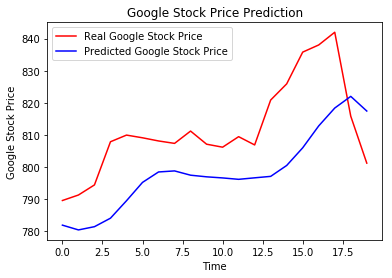

In [37]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Saving the model

In [38]:
from keras.models import load_model

regressor.save('LSTM_model.h5')

model = load_model('LSTM_model.h5')